In [6]:
import numpy as np
%matplotlib nbagg
from chickpea import Waveform, Element, Sequence, Segment

## First without segments:

### Readout Settings

In [7]:
p_dict = {'sample_rate': 1e9,
          'pulse_end': 2e-6,
          'pulse_readout_delay': 0,
          'marker_readout_delay': 0, 
          'readout_time': 1e-6, 
          'marker_time': 0.6e-6,
          'cycle_duration': 4e-6,
}

In [8]:
readout_start = p_dict['pulse_end'] + p_dict['pulse_readout_delay']
resolution = 1 / p_dict['sample_rate']

readout_start_points = round(readout_start / resolution)
readout_points = round(p_dict['readout_time'] / resolution)

total_points = round(p_dict['cycle_duration'] / resolution)
marker_points = round(p_dict['marker_time'] / resolution)

pulse_end_points = round(p_dict['pulse_end'] / resolution)

readout_waveform = Waveform(length=total_points, channel=4)
readout_waveform.wave[readout_start_points:readout_start_points + readout_points] = 1
readout_waveform.add_marker(1, readout_start_points, marker_points)
readout_waveform.add_marker(2, readout_start_points, marker_points)
readout_waveform.check()

True

<IPython.core.display.Javascript object>


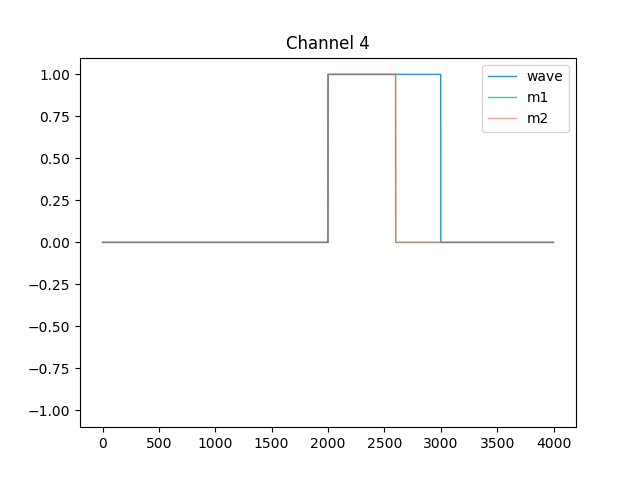

In [9]:
pl = readout_waveform.plot()

### SSB

In [10]:
ssb_sequence = Sequence(name='ssb',
                       variable=' diff down from f0',
                       variable_unit='GHz',
                       step=1e6,
                       start=0,
                       stop=200e6)

qubit_time = 1e-6
qubit_points = round(qubit_time / resolution)
qubit_time_array = np.arange(qubit_points) * resolution
freq_array = ssb_sequence.variable_array

for i, freq in enumerate(freq_array):
    element = Element()
    element.add_waveform(readout_waveform)
    qubit_i = Waveform(length=total_points, channel=1)
    qubit_q = Waveform(length=total_points, channel=2)
    if i == 0:
        qubit_i.add_marker(1, 0, marker_points)
    qubit_start = pulse_end_points - qubit_points
    qubit_end = pulse_end_points
    angle = qubit_time_array * freq * 2 * np.pi
    cos_array = np.cos(angle)
    sin_array = np.sin(angle)
    qubit_i.wave[qubit_start:qubit_end] = cos_array
    qubit_q.wave[qubit_start:qubit_end] = sin_array
    element.add_waveform(qubit_i)
    element.add_waveform(qubit_q)
    ssb_sequence.add_element(element)

ssb_sequence.check()

sequence check passed: 201 elements


True

### Plot Sequence

<IPython.core.display.Javascript object>


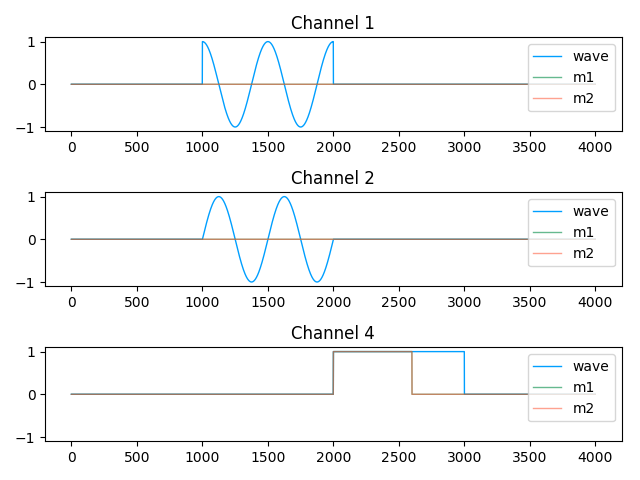

In [11]:
pl = ssb_sequence.plot(elemnum=2, channels=[1, 2, 4])

## Now with segments - TODO